In [2]:
# ==============================
# PROBLEM 1b
# ==============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Housing.csv")

# Features for Problem 1b (note: includes categorical yes/no variables)
features_1b = [
    "area", "bedrooms", "bathrooms", "stories",
    "mainroad", "guestroom", "basement",
    "hotwaterheating", "airconditioning",
    "parking", "prefarea"
]

X = df[features_1b].copy()
y = df["price"].values.astype(float)

# Encode yes/no categorical variables (1 = yes, 0 = no)
binary_cols = ["mainroad", "guestroom", "basement",
               "hotwaterheating", "airconditioning", "prefarea"]

for col in binary_cols:
    X[col] = X[col].map({"yes": 1, "no": 0})

X = X.values.astype(float)

# Rescale features and target for numerical stability (same as 1a)
X = X / np.max(X, axis=0)
y = y / np.max(y)

# Train-test split (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Add bias column
def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]

X_train_b = add_bias(X_train)
X_val_b = add_bias(X_val)

print("Train shape:", X_train_b.shape, "Val shape:", X_val_b.shape)


Train shape: (436, 12) Val shape: (109, 12)


In [3]:
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.05, n_iter=500):
    m, n = X_train.shape
    theta = np.zeros(n)
    train_losses, val_losses = [], []

    for i in range(n_iter):
        # Predictions
        y_pred = X_train @ theta
        error = y_pred - y_train

        # Gradient
        grad = (2/m) * (X_train.T @ error)

        # Update
        theta -= lr * grad

        # Losses (MSE)
        train_loss = np.mean((X_train @ theta - y_train) ** 2)
        val_loss = np.mean((X_val @ theta - y_val) ** 2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses


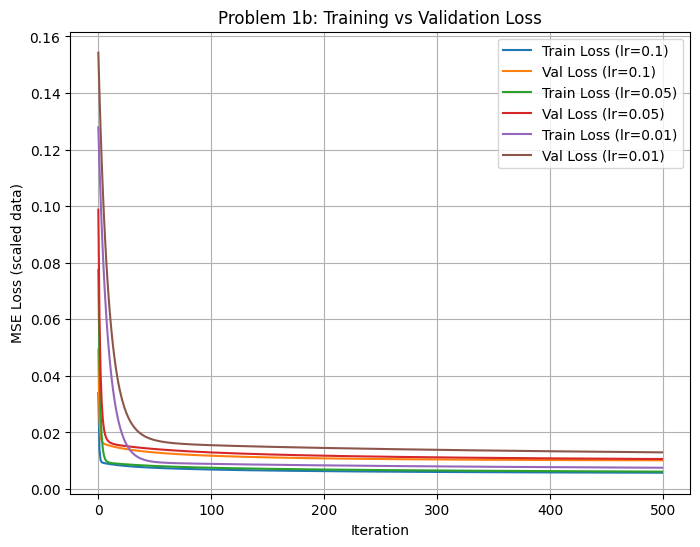

In [4]:
results = {}
for lr in [0.1, 0.05, 0.01]:
    theta, train_losses, val_losses = gradient_descent(
        X_train_b, y_train, X_val_b, y_val, lr=lr, n_iter=500
    )
    results[lr] = (theta, train_losses, val_losses)

# Plot losses
plt.figure(figsize=(8,6))
for lr, (theta, train_losses, val_losses) in results.items():
    plt.plot(train_losses, label=f"Train Loss (lr={lr})")
    plt.plot(val_losses, label=f"Val Loss (lr={lr})")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss (scaled data)")
plt.title("Problem 1b: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
for lr, (theta, train_losses, val_losses) in results.items():
    print(f"Learning rate = {lr}")
    print("Final Parameters (theta):", theta)
    print("Final Training Loss:", train_losses[-1])
    print("Final Validation Loss:", val_losses[-1])
    print("="*60)


Learning rate = 0.1
Final Parameters (theta): [0.01833036 0.23110667 0.0692358  0.24426091 0.12925158 0.03266484
 0.02274318 0.03134049 0.05552961 0.06492044 0.0694451  0.04897289]
Final Training Loss: 0.005766020104899048
Final Validation Loss: 0.010159257378597105
Learning rate = 0.05
Final Parameters (theta): [0.0510118  0.17027065 0.07862917 0.17808227 0.12359915 0.03438329
 0.02742506 0.02901486 0.05435236 0.07039069 0.08089035 0.05046829]
Final Training Loss: 0.006158636623576699
Final Validation Loss: 0.010610272780964141
Learning rate = 0.01
Final Parameters (theta): [0.10382512 0.07753355 0.07378554 0.08036381 0.08885984 0.06786244
 0.0297674  0.02997175 0.02780625 0.07948567 0.06633781 0.04453586]
Final Training Loss: 0.007528296608206704
Final Validation Loss: 0.012964054474416167
